2.1 0.8589918544502481 0.8592
0.020814554975190358
[28, 31, 34]


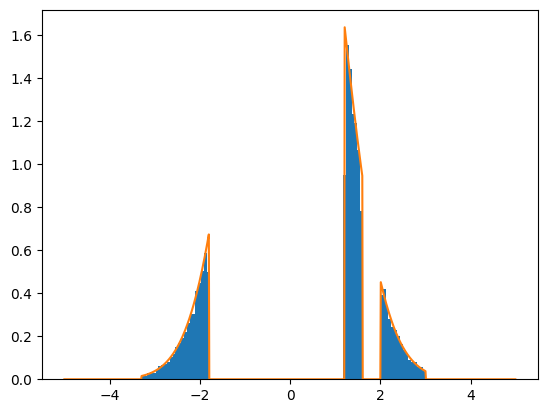

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
from truncated import indicator, tn_pdf, tn_cdf
from smc import SMC

intervals = [[-3.3, -1.8], [1.2, 1.6], [2, 3]]
sampler = SMC(lambda x: norm.pdf(x) * indicator(intervals)(x), 
              start=-100, end=100, seed=None)

x = sampler.sampling(30000)
plt.hist(x, density=True, bins=100)
plt.plot(tmp := np.arange(-5, 5, 0.01), tn_pdf(tmp, intervals))
print(stat := 2.1, tn_cdf(stat, intervals), np.mean(x <= stat))
print(np.abs(tn_cdf(stat, intervals) - np.mean(x <= stat)) * 100)

print(sampler.mh_steps)

0.55 0.19860009597833073 0.20076666666666668
0.21665706883359503
[23, 21]


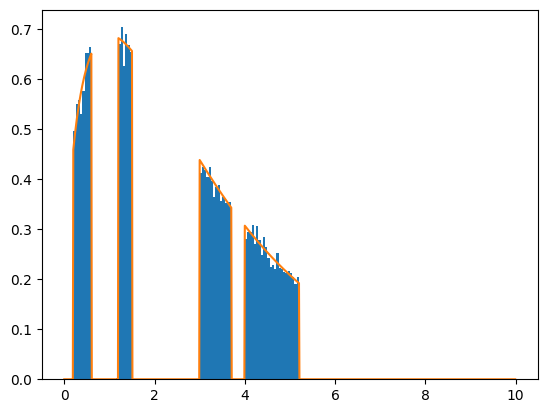

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import chi2
from truncated import indicator, tc2_pdf, tc2_cdf
from smc import SMC

intervals = [[0.2, 0.6], [1.2, 1.5], [3, 3.7], [4, 5.2]]
sampler = SMC(lambda x: chi2.pdf(x, 3) * indicator(intervals)(x), 
              start=0, end=100, seed=None)

x = sampler.sampling(30000)
plt.hist(x, density=True, bins=100)
plt.plot(tmp := np.arange(0, 10, 0.01), tc2_pdf(tmp, 3, intervals))
print(stat := 0.55, tc2_cdf(stat, 3, intervals), np.mean(x <= stat))
print(np.abs(tc2_cdf(stat, 3, intervals) - np.mean(x <= stat)) * 100)

print(sampler.mh_steps)